# Difusión en una dimensión

In [1]:
%matplotlib inline

In [2]:
import scipy as np
from matplotlib import pyplot as plt

## Parámetros

In [3]:
data = np.loadtxt('initial_f.csv' , delimiter=',' )

In [93]:
x = data[ : , 0 ]
u0 = data[ : , 1 ]

In [206]:
L  = x[-1] - x[0]      # longitud del sistema 1D
nx = x.size            # nodos espaciales
dx = x[ 1] - x[0]      # equiespaciados

T= 0.03            # tiempo total
dt = 1e-5     # intervalo temporal
nt = int(T / dt)            # pasos temporales


D = 1              # difusividad

### ¡Número difusivo

In [193]:
Co = D * dt / dx**2
Co

0.015999999999999997

### Condiciones iniciales

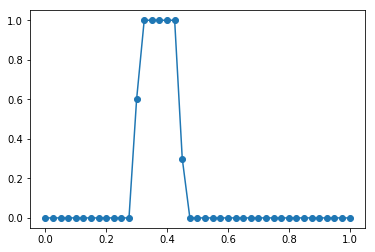

In [95]:
plt.plot( x , u0 , 'o-')

### Un paso en el tiempo

Recordemos que queremos implementar $u_i^{n+1} = u_i^n + \mathrm{Co} (u_{i+1}^n +  u_{i-1}^n  - 2 u_i^n)$

Aumentamos nuestro sistema con dos extremos adicionales, que ponemos 0 (condiciones de Dirichlet homogéneas)

In [55]:
u = np.zeros( nx + 2  )

In [56]:
u[ 1 : nx +1 ] = u0

In [57]:
nnx = u.size

In [58]:
un = u.copy()         # distribución actual

for i in range( 1 , nx +1 ):
   u[i] = un[i] + Co * (un[i+1] + un[i-1] - 2 * un[i] )

        

El vector uf recibe la solución final, y le quitamos los dos extremos:

In [59]:
uf = u[ 1 : nx +1 ]

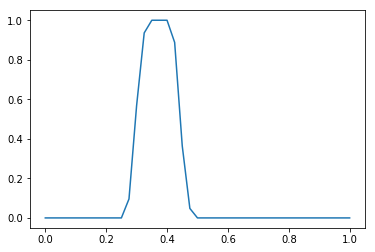

In [60]:
plt.plot( x , uf)

### Tiempo completo

In [207]:
u[ 0 ] = u[ nx + 1 ] = 0
u[ 1 : nx +1 ] = u0

In [208]:

for n in range(nt ):
    un = u.copy()
    for i in range( 1 , nx +1 ): 
           u[i] = un[i] + (Co / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )

        

In [209]:
uf = u[ 1 : nx +1 ]

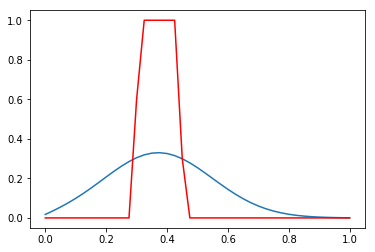

In [210]:
plt.plot(x , uf , x , u0 , 'r')

Es interesante comprobar si se pierde "masa" (energía... lo que sea )

In [77]:
import scipy.integrate as integrate

In [84]:
I0 = integrate.trapz( x, u0)
print( I0 )

-0.14749999999999996


In [211]:
integrate.trapz( x, uf)

-0.14281946028104475

... probablemente, se pierde por los bordes sobre todo

## Condiciones "adiabáticas" (Neumann homogéneas)

In [212]:
u[ 0 ] = u0[0]
u[-1]  = u0[-1]
u[ 1 : nx +1 ] = u0

I = [I0]

In [213]:
for n in range( nt ):
    un = u.copy()
    un [0]  = un[1]   # derivada cero a la izquierda
    un [-1] = un[-2]  # derivada cero a la derecha
    
    # una alternativa sería hacer un bucle de 2 a nx sólo, con expresiones
    # especiales para 1 y nx+1
    for i in range( 1 , nx +1 ): 
           u[i] = un[i] + (Co / 2.0) * (un[i+1] + un[i-1] - 2 * un[i] )
    
    I.append(  integrate.trapz( x, u[1 : nx+1 ] ) )

In [214]:
uf = u[ 1 : nx +1 ]

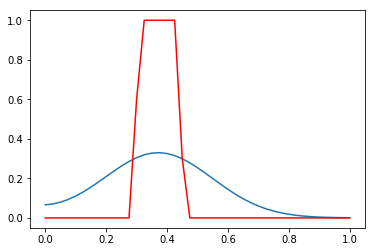

In [215]:
plt.plot(x , uf , x , u0 , 'r')

In [216]:
integrate.trapz( x, uf )

-0.14553122279792047

In [217]:
I0

-0.14749999999999996

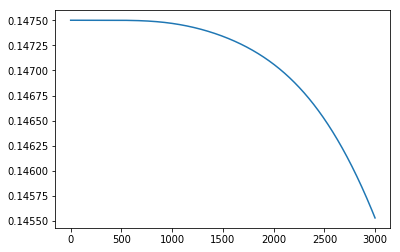

In [218]:
plt.plot( (-1)*np.array(I) )